In [320]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 

# 1. Rating Analysis:

In [397]:
# What is the average user rating across all books?

average_rating = database['User Rating'].mean()

In [408]:
print('the average book rating across all the books is:',average_rating)

the average book rating across all the books is: 4.618363636363637


In [409]:
# Which books have the highest and lowest user ratings?

highest_rated_books=database[database['User Rating']==database['User Rating'].max()]
print(highest_rated_books)

                                                  Name                 Author  \
40            Brown Bear, Brown Bear, What Do You See?        Bill Martin Jr.   
41            Brown Bear, Brown Bear, What Do You See?        Bill Martin Jr.   
81   Dog Man and Cat Kid: From the Creator of Capta...             Dav Pilkey   
82   Dog Man: A Tale of Two Kitties: From the Creat...             Dav Pilkey   
83   Dog Man: Brawl of the Wild: From the Creator o...             Dav Pilkey   
84   Dog Man: Brawl of the Wild: From the Creator o...             Dav Pilkey   
85   Dog Man: Fetch-22: From the Creator of Captain...             Dav Pilkey   
86   Dog Man: For Whom the Ball Rolls: From the Cre...             Dav Pilkey   
87   Dog Man: Lord of the Fleas: From the Creator o...             Dav Pilkey   
146  Goodnight, Goodnight Construction Site (Hardco...   Sherri Duskey Rinker   
147  Goodnight, Goodnight Construction Site (Hardco...   Sherri Duskey Rinker   
151                         

In [412]:
lowest_rated_books=database[database['User Rating']==database['User Rating'].min()]
print("Book(s) with the highest user rating:")
print(lowest_rated_books)

Book(s) with the highest user rating:
                   Name        Author  User Rating  Reviews  Price  Year  \
353  The Casual Vacancy  J.K. Rowling          3.3     9372     12  2012   

       Genre  
353  Fiction  


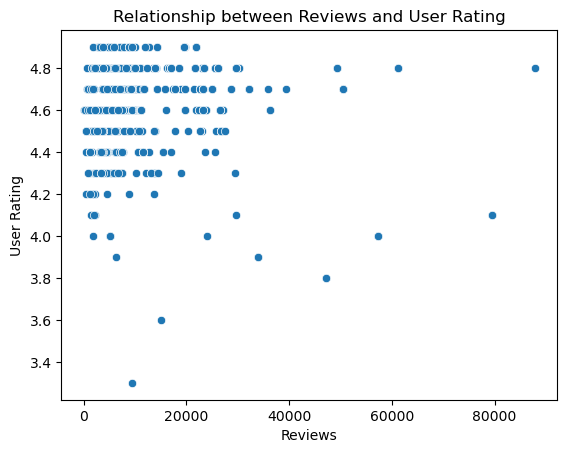

In [421]:
# Is there a relationship between the number of reviews and the user rating?

sns.scatterplot(x='Reviews',y='User Rating',data=database)
plt.title("Relationship between Reviews and User Rating")
plt.show()

In [415]:
database[['Reviews','User Rating']].corr() # there is no strong relationship b/w them

,Reviews,User Rating
Reviews,1.000000,-0.001729
User Rating,-0.001729,1.000000


# 2. Price and Sales Analysis:

In [488]:
#What is the average price of books in different genres (Fiction vs. Non Fiction)?

Avearge_price_by_genre=database.groupby('Genre')['Price'].mean()
print('Average price of books in different genres are :',Avearge_price_by_genre)

Average price of books in different genres are : Genre
Fiction        10.850000
Non Fiction    14.841935
Name: Price, dtype: float64


In [443]:
n= list(database.groupby('Genre')['Price'].mean().values)

In [444]:
i = list(database.groupby('Genre')['Price'].mean().keys())

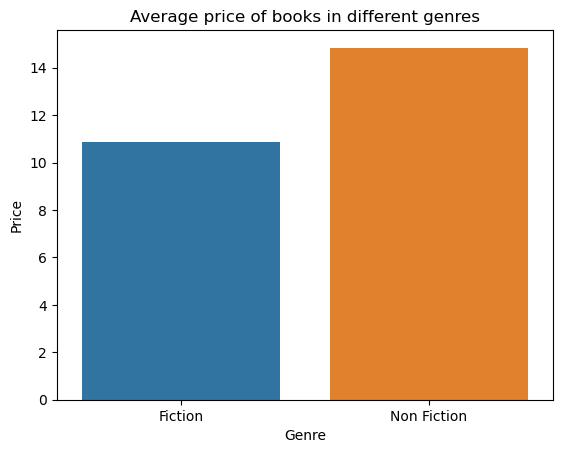

In [446]:
sns.barplot(x=i,y=n)
plt.title('Average price of books in different genres')
plt.xlabel('Genre')
plt.ylabel('Price')
plt.show()

<Axes: xlabel='Price', ylabel='User Rating'>

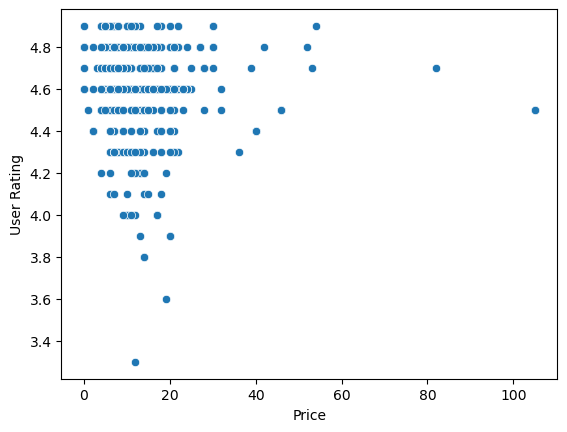

In [449]:
#Is there a relationship between the number of reviews and the user rating?
sns.scatterplot(x='Price',y='User Rating',data=database)

In [453]:
database[['Price','User Rating']].corr()

,Price,User Rating
Price,1.000000,-0.133086
User Rating,-0.133086,1.000000


In [454]:
# Which year had the highest average price for books?

database.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [487]:
highest_average_price_year= database.groupby('Year')['Price'].mean().idxmax()
print("The year which had the highest average price for books are:",highest_average_price_year)

The year which had the highest average price for books are: 2009


In [479]:
# Identify the top 10 most expensive books and analyze their ratings and reviews. 

Top10_expensive_books=database.groupby(['Name','User Rating','Reviews'])['Price'].max().sort_values(ascending=False)
print('The top 10 most expensive books and their rating and reviews are:')
Top10_expensive_books.head(10)

The top 10 most expensive books and their rating and reviews are:


Name                                                                               User Rating  Reviews
Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5          4.5          6679       105
The Twilight Saga Collection                                                       4.7          3801        82
Hamilton: The Revolution                                                           4.9          5867        54
The Book of Basketball: The NBA According to The Sports Guy                        4.7          858         53
Harry Potter Paperback Box Set (Books 1-7)                                         4.8          13471       52
Publication Manual of the American Psychological Association, 6th Edition          4.5          8580        46
Watchmen                                                                           4.8          3829        42
The Official SAT Study Guide                                                       4.4          1201        40
The Alch

# 3. Author Performance:

In [489]:
# Who are the top 5 authors with the most books in this dataset?

top5_author=database.groupby('Author')['Name'].value_counts().sort_values(ascending=False).reset_index()
print("The top 5 authors with the most books in this dataset are:")
top5_author.head()


The top 5 authors with the most books in this dataset are:


,Author,Name,count
0,American Psychological Association,Publication Manual of the American Psychologic...,10
1,Gallup,StrengthsFinder 2.0,9
2,Dr. Seuss,"Oh, the Places You'll Go!",8
3,Stephen R. Covey,The 7 Habits of Highly Effective People: Power...,7
4,Eric Carle,The Very Hungry Caterpillar,7


In [529]:
# Which author has the highest average user rating across all their books?

High_rat_auth= database.groupby('Author')['User Rating'].mean().idxmax()
print('Author who have the highest average user rating across all the books is :')
High_rat_auth

Author who have the highest average user rating across all the books is :


'Alice Schertle'

In [548]:
# Analyze the distribution of user ratings and reviews for the top authors.
top_reviews=database.sort_values(by=['User Rating','Reviews'],ascending=[False,False])
top_reviews.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
246,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2013,Fiction
247,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2014,Fiction
248,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2015,Fiction
249,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2016,Fiction


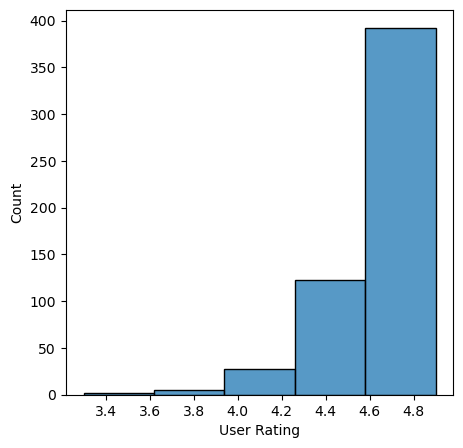

In [553]:
plt.figure(figsize=(5,5))
sns.histplot(x='User Rating',bins=5,data=top_reviews)
plt.show()

# 4. Yearly Trends:

In [563]:
#How has the average rating of books changed over the years?

avg_rating_per_year= database.groupby('Year')['User Rating'].mean().reset_index()

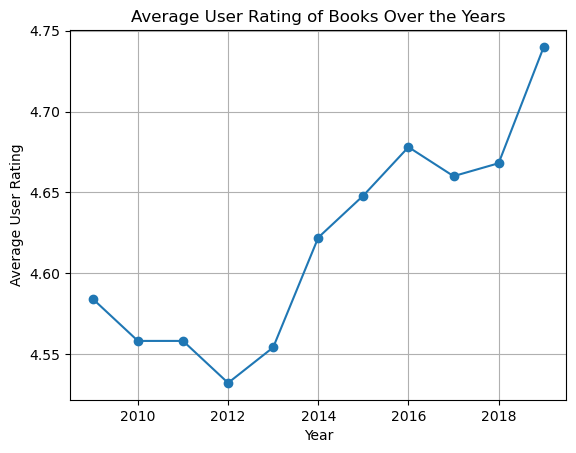

In [566]:
plt.plot(avg_rating_per_year['Year'],avg_rating_per_year['User Rating'],marker='o')
plt.xlabel('Year')
plt.ylabel('Average User Rating')
plt.title('Average User Rating of Books Over the Years')
plt.grid(True)
plt.show()

In [568]:
#Which year had the highest number of bestsellers?
database.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [574]:
bestsellers_per_year= database.groupby('Year').size().reset_index(name='Number of Bestsellers')
bestsellers_per_year

,Year,Number of Bestsellers
0,2009,50
1,2010,50
2,2011,50
3,2012,50
4,2013,50
5,2014,50
6,2015,50
7,2016,50
8,2017,50
9,2018,50


In [586]:
#Is there a trend in the genre (Fiction vs. Non Fiction) that becomes a bestseller in certain years?

genre_trend=database.groupby(['Year','Genre']).size().reset_index(name='count')

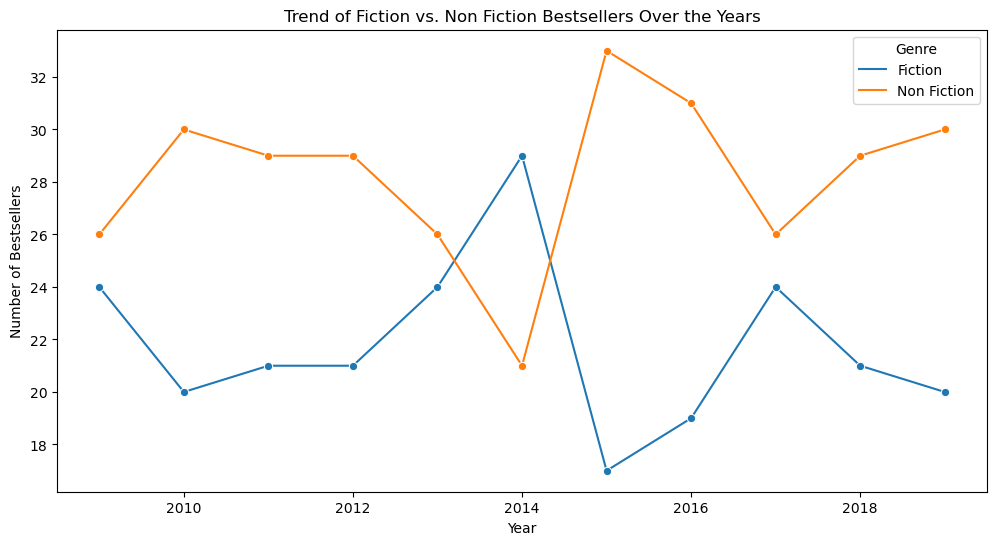

In [589]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_trend, x='Year', y='count', hue='Genre', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Bestsellers')
plt.title('Trend of Fiction vs. Non Fiction Bestsellers Over the Years')
plt.show()

# 5. Genre Analysis:

In [598]:
#What is the distribution of books between the Fiction and Non Fiction genres?
database['Genre'].value_counts()

Index(['Non Fiction', 'Fiction'], dtype='object', name='Genre')

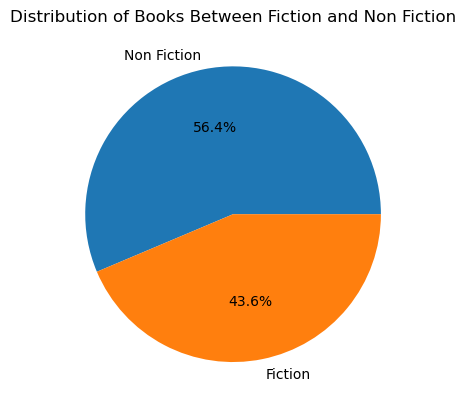

In [617]:
# Generate the pie chart
plt.pie(list(database['Genre'].value_counts().values), labels=list(database['Genre'].value_counts().index), autopct='%1.1f%%')
plt.title('Distribution of Books Between Fiction and Non Fiction')
plt.show()

In [621]:
#Which genre tends to have higher user ratings?

database.groupby('Genre')['User Rating'].max()

Genre
Fiction        4.9
Non Fiction    4.9
Name: User Rating, dtype: float64

In [622]:
database.groupby('Genre')['User Rating'].mean()

Genre
Fiction        4.648333
Non Fiction    4.595161
Name: User Rating, dtype: float64

Text(0.5, 1.0, 'Average User Rating by Genre')

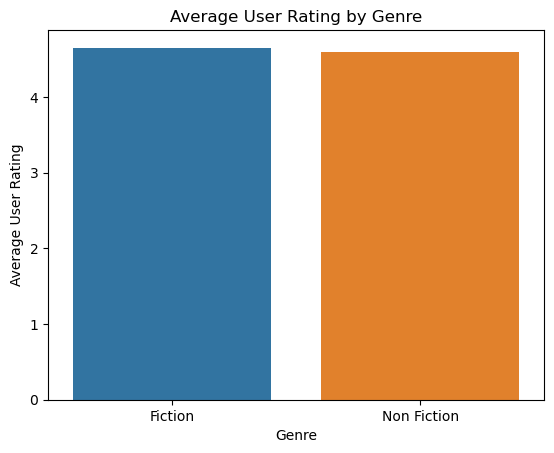

In [624]:
sns.barplot(x=database.groupby('Genre')['User Rating'].mean().index,y=database.groupby('Genre')['User Rating'].mean().values)
plt.xlabel('Genre')
plt.ylabel('Average User Rating')
plt.title('Average User Rating by Genre')

In [630]:
# Is there a significant difference in the number of reviews between the two genres?

database.groupby('Genre')['Reviews'].describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Fiction,240.0,15683.791667,13984.120890,548.0,6162.5,10922.0,21834.00,87841.0
Non Fiction,310.0,9065.145161,8606.737629,37.0,3235.0,6346.0,11124.25,61133.0


In [636]:
#Which genre tends to have higher user ratings?

highr_rat=database.groupby('Genre')['User Rating'].mean()
print('The genre with the higher average user rating is the one that tends to have higher user ratings in general.')
highr_rat

The genre with the higher average user rating is the one that tends to have higher user ratings in general.


Genre
Fiction        4.648333
Non Fiction    4.595161
Name: User Rating, dtype: float64

# 6. Review Analysis:


In [668]:
#Which books have the most and least number of reviews?
lease_review=database.iloc[78:79]
print("the least reviews book is :")
lease_review

the least reviews book is :


,Name,Author,User Rating,Reviews,Price,Year,Genre
78,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6,2009,Non Fiction


In [664]:
database['Reviews'].idxmin()

78

In [655]:
min_review['Reviews'].idxmax()

534

In [663]:
most_reviews= database.iloc[534:535]
print("the most reviews book is :")
most_reviews

the most reviews book is :


,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [670]:
# Is there a relationship between the year of publication and the number of reviews?
database[['Reviews','Year']].corr()

,Reviews,Year
Reviews,1.00000,0.26356
Year,0.26356,1.00000


In [679]:
#Do books with more reviews tend to have a higher or lower user rating?
database.sort_values(by=['Reviews','User Rating'],ascending=[False,False])

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
...,...,...,...,...,...,...,...
359,The Daily Show with Jon Stewart Presents Earth...,Jon Stewart,4.4,440,11,2010,Non Fiction
512,True Compass: A Memoir,Edward M. Kennedy,4.5,438,15,2009,Non Fiction
121,George Washington's Sacred Fire,Peter A. Lillback,4.5,408,20,2010,Non Fiction
300,Soul Healing Miracles: Ancient and New Sacred ...,Zhi Gang Sha,4.6,220,17,2013,Non Fiction


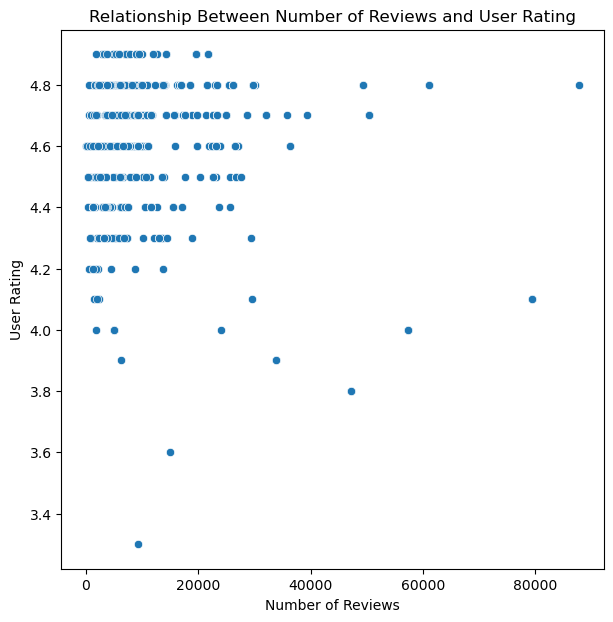

In [684]:
##Do books with more reviews tend to have a higher or lower user rating?
plt.figure(figsize=(7,7))
sns.scatterplot(x='Reviews',y='User Rating',data=database)
plt.xlabel('Number of Reviews')
plt.ylabel('User Rating')
plt.title('Relationship Between Number of Reviews and User Rating')
plt.show()

In [681]:
database['Reviews'].corr(database['User Rating'])


# Negative correlation: Books with more reviews tend to have lower ratings.

-0.0017290142555501094

# 7. Comparative Analysis:

In [685]:
#Compare the average price, user rating, and number of reviews between Fiction and Non-Fiction books.
database.head()


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [695]:
comp=database.groupby('Genre')[['Price','User Rating','Reviews']].mean()

In [697]:
comp

,Price,User Rating,Reviews
Genre,,,
Fiction,10.850000,4.648333,15683.791667
Non Fiction,14.841935,4.595161,9065.145161


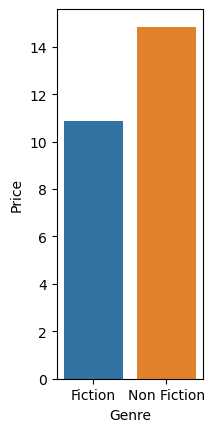

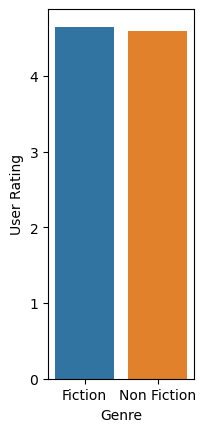

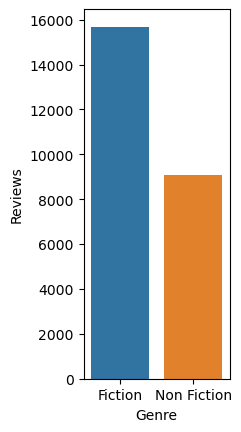

In [707]:

plt.subplot(1,3,1)
sns.barplot(x=comp.index,y='Price',data=comp)
plt.show()


plt.subplot(1,3,2)
sns.barplot(x=comp.index,y='User Rating',data=comp)
plt.show()


plt.subplot(1,3,3)
sns.barplot(x=comp.index,y='Reviews',data=comp)
plt.show()

In [721]:
#How do the top-rated Fiction books compare to the top-rated Non-Fiction books in terms of price and reviews?

top_fiction=database[(database['Genre']=='Fiction') & (database['User Rating']>=4.9)]
top_nonfiction = database[(database['Genre'] == 'Non Fiction') & (database['User Rating'] >= 4.9)]

In [723]:
fiction_stats=top_fiction[['Price','Reviews']].mean()
nonfiction_stats = top_nonfiction[['Price', 'Reviews']].mean()

In [724]:
fiction_stats
nonfiction_stats

Price         14.272727
Reviews    13013.090909
dtype: float64

# 8. Top Books Identification:

In [728]:
#Identify the top 10 books with the highest user ratings and analyze their prices and reviews.

Top_10books= database.sort_values(by='User Rating',ascending=False).head(10)

In [741]:
avg_price = Top_10books['Price'].mean()
avg_reviews = Top_10books['Reviews'].mean()

print(f"Average Price of Top 10 Rated Books: {avg_price}")
print(f"Average Reviews of Top 10 Rated Books: {avg_reviews}")

Average Price of Top 10 Rated Books: 5.9
Average Reviews of Top 10 Rated Books: 11119.4


In [731]:
Top_10books

,Name,Author,User Rating,Reviews,Price,Year,Genre
431,The Magnolia Story,Chip Gaines,4.9,7861,5,2016,Non Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2019,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,2018,Fiction
252,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2019,Fiction
476,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2013,Fiction
477,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2014,Fiction


In [734]:
#Which books are consistently in the top 10 in terms of ratings, reviews, and price?

database.sort_values(by=['User Rating','Reviews','Price'],ascending=[False,False,False]).head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
246,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2013,Fiction
247,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2014,Fiction
248,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2015,Fiction
249,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2016,Fiction
250,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2017,Fiction
251,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2018,Fiction
252,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2019,Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


In [738]:
# Top 10 books by User Rating
top_rated_books = database.nlargest(10, 'User Rating')

# Top 10 books by Reviews
top_reviewed_books = database.nlargest(10, 'Reviews')

# Top 10 books by Price
top_priced_books = database.nlargest(10, 'Price')

# Display the top 10 books in each category
print("Top 10 by Ratings:\n", top_rated_books[['Name', 'User Rating', 'Reviews', 'Price']])
print("Top 10 by Reviews:\n", top_reviewed_books[['Name', 'User Rating', 'Reviews', 'Price']])
print("Top 10 by Price:\n", top_priced_books[['Name', 'User Rating', 'Reviews', 'Price']])

Top 10 by Ratings:
                                                   Name  User Rating  Reviews  \
40            Brown Bear, Brown Bear, What Do You See?          4.9    14344   
41            Brown Bear, Brown Bear, What Do You See?          4.9    14344   
81   Dog Man and Cat Kid: From the Creator of Capta...          4.9     5062   
82   Dog Man: A Tale of Two Kitties: From the Creat...          4.9     4786   
83   Dog Man: Brawl of the Wild: From the Creator o...          4.9     7235   
84   Dog Man: Brawl of the Wild: From the Creator o...          4.9     7235   
85   Dog Man: Fetch-22: From the Creator of Captain...          4.9    12619   
86   Dog Man: For Whom the Ball Rolls: From the Cre...          4.9     9089   
87   Dog Man: Lord of the Fleas: From the Creator o...          4.9     5470   
146  Goodnight, Goodnight Construction Site (Hardco...          4.9     7038   

     Price  
40       5  
41       5  
81       6  
82       8  
83       4  
84       4  
85      

In [739]:
# Convert the book names to sets for comparison
top_rated_set = set(top_rated_books['Name'])
top_reviewed_set = set(top_reviewed_books['Name'])
top_priced_set = set(top_priced_books['Name'])

# Find the intersection of the three sets (books that are common in all top 10 lists)
consistent_top_books = top_rated_set & top_reviewed_set & top_priced_set

# Display the books that are consistently in the top 10 across ratings, reviews, and price
print("Books consistently in the top 10 for ratings, reviews, and price:\n", consistent_top_books)

Books consistently in the top 10 for ratings, reviews, and price:
 set()


# 9. Genre-Specific Trends:

In [749]:
# Within each genre, identify the top 5 most reviewed books and analyze their ratings and prices.
Fic = database[database['Genre']=='Fiction']

In [756]:
top5=Fic.nlargest(5, ['User Rating','Price'])

In [757]:
top5

,Name,Author,User Rating,Reviews,Price,Year,Genre
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction
156,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,4.9,3146,30,2017,Fiction
157,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,4.9,10052,22,2016,Fiction
420,The Legend of Zelda: Hyrule Historia,Patrick Thorpe,4.9,5396,20,2013,Fiction
155,Harry Potter and the Goblet of Fire: The Illus...,J. K. Rowling,4.9,7758,18,2019,Fiction


In [758]:
nonfic = database[database['Genre']=='Non Fiction']

In [759]:
topnon5=nonfic.nlargest(5, ['User Rating','Price'])

In [760]:
topnon5

,Name,Author,User Rating,Reviews,Price,Year,Genre
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
244,Obama: An Intimate Portrait,Pete Souza,4.9,3192,22,2017,Non Fiction
174,Humans of New York : Stories,Brandon Stanton,4.9,2812,17,2015,Non Fiction
521,Unfreedom of the Press,Mark R. Levin,4.9,5956,11,2019,Non Fiction
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


In [764]:
#How has the popularity of Fiction versus Non-Fiction changed over the years in terms of average ratings and reviews?

database.groupby(['Year','Genre'])[['User Rating','Reviews']].mean().reset_index()

,Year,Genre,User Rating,Reviews
0,2009,Fiction,4.591667,6534.333333
1,2009,Non Fiction,4.576923,3026.230769
2,2010,Fiction,4.615000,8409.250000
3,2010,Non Fiction,4.520000,3526.533333
4,2011,Fiction,4.619048,10335.285714
5,2011,Non Fiction,4.513793,6482.758621
6,2012,Fiction,4.495238,19896.238095
7,2012,Non Fiction,4.558621,8162.931034
8,2013,Fiction,4.545833,19986.833333
9,2013,Non Fiction,4.561538,6739.346154


# 10. Outlier Detection:

<Axes: >

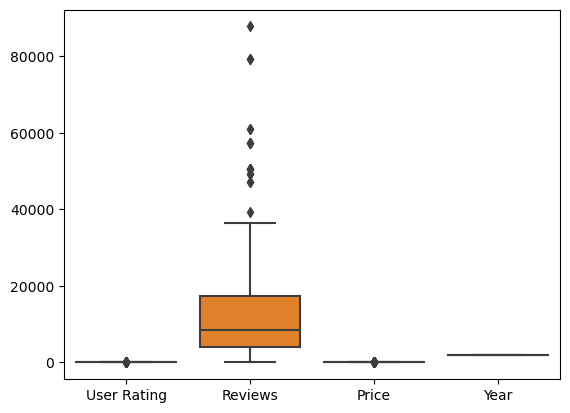

In [765]:
#Are there any books that are outliers in terms of price, rating, or reviews?
sns.boxplot(database)

In [767]:
#iqr for price
q1_price= database['Price'].quantile(0.25)
q3_price= database['Price'].quantile(0.75)
iqr_price = q3_price-q1_price

#iqr for price
q1_rating = database['User Rating'].quantile(0.25)
q3_rating = database['User Rating'].quantile(0.75)
iqr_rating=q3_rating-q1_rating

# iqr for review
q1_review = database['Reviews'].quantile(0.25)
q3_review = database['Reviews'].quantile(0.75)
iqr_review= q3_review-q1_review


In [768]:
#Define Lower and Upper Bounds for Outliers

# Price outlier bounds
lower_price = q1_price-1.5*iqr_price
upper_price= q3_price+1.5*iqr_price

# rating outlier bounds

lower_rating = q1_rating-1.5*iqr_rating
upper_rating = q3_rating+1.5*iqr_rating

# review outlier bounds

lower_review = q1_review-1.5*iqr_review
upper_review = q3_review+1.5*iqr_review


In [771]:
# Now, we can filter the DataFrame to find books that are outliers in terms of price, user rating, or reviews.

price_outliers = database[(database['Price'] < lower_price) | (database['Price'] > upper_price)]
rating_outlier = database[(database['User Rating']<lower_rating) | (database['User Rating']>upper_rating)]
review_outlier = database[(database['Reviews']<lower_review) | (database['Reviews']>upper_review)]

# Display outliers
print("Price Outliers:\n", price_outliers[['Name', 'Price', 'User Rating', 'Reviews']])
print("\nRating Outliers:\n", rating_outlier[['Name', 'Price', 'User Rating', 'Reviews']])
print("\nReviews Outliers:\n", review_outlier[['Name', 'Price', 'User Rating', 'Reviews']])

Price Outliers:
                                                   Name  Price  User Rating  \
6    A Game of Thrones / A Clash of Kings / A Storm...     30          4.7   
12                             A Stolen Life: A Memoir     32          4.6   
69   Diagnostic and Statistical Manual of Mental Di...    105          4.5   
70   Diagnostic and Statistical Manual of Mental Di...    105          4.5   
108  Fifty Shades Trilogy (Fifty Shades of Grey / F...     32          4.5   
151                           Hamilton: The Revolution     54          4.9   
153  Harry Potter and the Chamber of Secrets: The I...     30          4.9   
156  Harry Potter and the Prisoner of Azkaban: The ...     30          4.9   
159         Harry Potter Paperback Box Set (Books 1-7)     52          4.8   
271  Publication Manual of the American Psychologic...     46          4.5   
272  Publication Manual of the American Psychologic...     46          4.5   
273  Publication Manual of the American Psychol

In [773]:
#How do these outliers compare to the rest of the dataset?

# Find non-outliers in Price
non_price_outliers = database[(database['Price'] >= lower_price) & (database['Price'] <= upper_price)]

# Find non-outliers in User Rating
non_rating_outliers = database[(database['User Rating'] >= lower_rating) & (database['User Rating'] <= upper_rating)]

# Find non-outliers in Reviews
non_reviews_outliers = database[(database['Reviews'] >= lower_review) & (database['Reviews'] <= upper_review)]



In [774]:
# Compare the statistics for Price between outliers and non-outliers
price_outlier_stats = price_outliers['Price'].describe()
non_price_outlier_stats = non_price_outliers['Price'].describe()

print("Price Outlier Stats:\n", price_outlier_stats)
print("\nNon-Price Outlier Stats:\n", non_price_outlier_stats)

Price Outlier Stats:
 count     31.000000
mean      46.516129
std       18.633073
min       30.000000
25%       37.500000
50%       46.000000
75%       46.000000
max      105.000000
Name: Price, dtype: float64

Non-Price Outlier Stats:
 count    519.000000
mean      11.104046
std        5.802140
min        0.000000
25%        7.000000
50%       10.000000
75%       15.000000
max       28.000000
Name: Price, dtype: float64


In [778]:
# Compare the statistics for User Rating between outliers and non-outliers
rating_outlier_stats = rating_outlier['User Rating'].describe()
non_rating_outlier_stats = non_rating_outliers['User Rating'].describe()

print("\nUser Rating Outlier Stats:\n", rating_outlier_stats)
print("\nNon-User Rating Outlier Stats:\n", non_rating_outlier_stats)

# Compare the statistics for Reviews between outliers and non-outliers
reviews_outlier_stats = review_outlier['Reviews'].describe()
non_reviews_outlier_stats = non_reviews_outliers['Reviews'].describe()

print("\nReviews Outlier Stats:\n", reviews_outlier_stats)
print("\nNon-Reviews Outlier Stats:\n", non_reviews_outlier_stats)


User Rating Outlier Stats:
 count    21.000000
mean      3.914286
std       0.174028
min       3.300000
25%       3.900000
50%       4.000000
75%       4.000000
max       4.000000
Name: User Rating, dtype: float64

Non-User Rating Outlier Stats:
 count    529.000000
mean       4.646314
std        0.178670
min        4.100000
25%        4.500000
50%        4.700000
75%        4.800000
max        4.900000
Name: User Rating, dtype: float64

Reviews Outlier Stats:
 count       17.000000
mean     57370.882353
std      13174.247407
min      39459.000000
25%      49288.000000
50%      50482.000000
75%      61133.000000
max      87841.000000
Name: Reviews, dtype: float64

Non-Reviews Outlier Stats:
 count      533.000000
mean     10504.690432
std       8293.348208
min         37.000000
25%       3837.000000
50%       7932.000000
75%      15779.000000
max      36348.000000
Name: Reviews, dtype: float64


In [787]:
database.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Encoded_gen
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,1


# Machine Learning model

In [780]:
from sklearn.preprocessing import LabelEncoder

In [782]:
le = LabelEncoder()
arr= le.fit_transform(database['Genre'])

In [786]:
database['Encoded_gen']=pd.DataFrame(arr,columns=['Genre'])

In [788]:
x = database[['User Rating','Reviews','Price','Year']]
y = database['Encoded_gen']

In [823]:
from sklearn.preprocessing import StandardScaler

In [825]:
ss=StandardScaler()
ar = ss.fit_transform(x)

In [833]:
x = pd.DataFrame(ar,columns=x.columns)

In [834]:
from sklearn.model_selection import train_test_split

In [891]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=40)

In [892]:
from sklearn.linear_model import LogisticRegression

In [893]:
lr = LogisticRegression()
lr.fit(x_test,y_test)

LogisticRegression()

In [894]:
lr.score(x_test,y_test)*100

69.6969696969697

In [895]:
lr.score(x_train,y_train)*100

65.1948051948052

In [840]:
y_pred=lr.predict(x_test)

In [841]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [842]:
cm = confusion_matrix(y_test,y_pred)

In [843]:
cm

array([[39, 35],
       [13, 78]])

In [844]:
precision_score(y_test,y_pred)

0.6902654867256637

In [845]:
recall_score(y_test,y_pred)

0.8571428571428571

In [846]:
f1_score(y_test,y_pred)

0.7647058823529412

<Axes: >

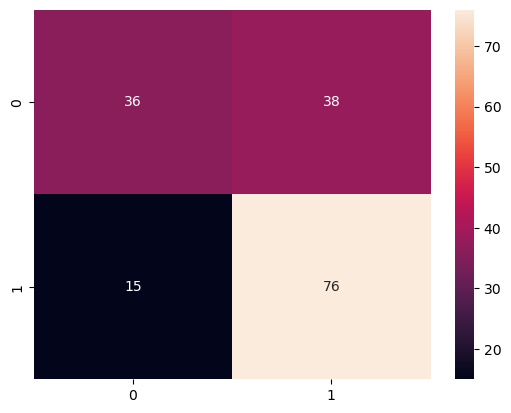

In [822]:
sns.heatmap(cm,annot=True)

In [897]:
for i in range(1,100):
    mode = x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=30,random_state=i)
    lr1 = LogisticRegression()
    lr1.fit(x_test,y_test)
    print(lr1.score(x_train,y_train)*100,lr1.score(x_test,y_test)*100,i)


63.653846153846146 76.66666666666667 1
59.61538461538461 76.66666666666667 2
54.42307692307692 76.66666666666667 3
66.73076923076923 76.66666666666667 4
58.07692307692308 70.0 5
50.96153846153846 70.0 6
51.92307692307693 73.33333333333333 7
67.6923076923077 76.66666666666667 8
63.653846153846146 60.0 9
63.26923076923077 60.0 10
55.00000000000001 70.0 11
62.88461538461539 53.333333333333336 12
58.65384615384615 66.66666666666666 13
63.07692307692307 76.66666666666667 14
60.57692307692307 73.33333333333333 15
62.11538461538461 73.33333333333333 16
55.38461538461539 73.33333333333333 17
65.57692307692308 70.0 18
65.57692307692308 73.33333333333333 19
60.76923076923077 76.66666666666667 20
66.15384615384615 80.0 21
50.57692307692307 63.33333333333333 22
63.653846153846146 86.66666666666667 23
64.23076923076924 73.33333333333333 24
63.07692307692307 73.33333333333333 25
65.57692307692308 70.0 26
63.46153846153846 73.33333333333333 27
67.6923076923077 73.33333333333333 28
69.61538461538461 7